**1. Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.**

We begin with importing the libraries, loading the data and standardizing it:

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [1]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Next, we fit k-means with k values equal to 2, 3, 4, 5 and 6:

In [19]:
# Defining the k-means

cluster_numbers = [2, 3, 4, 5, 6]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

Next, we visualize each k-means solution:

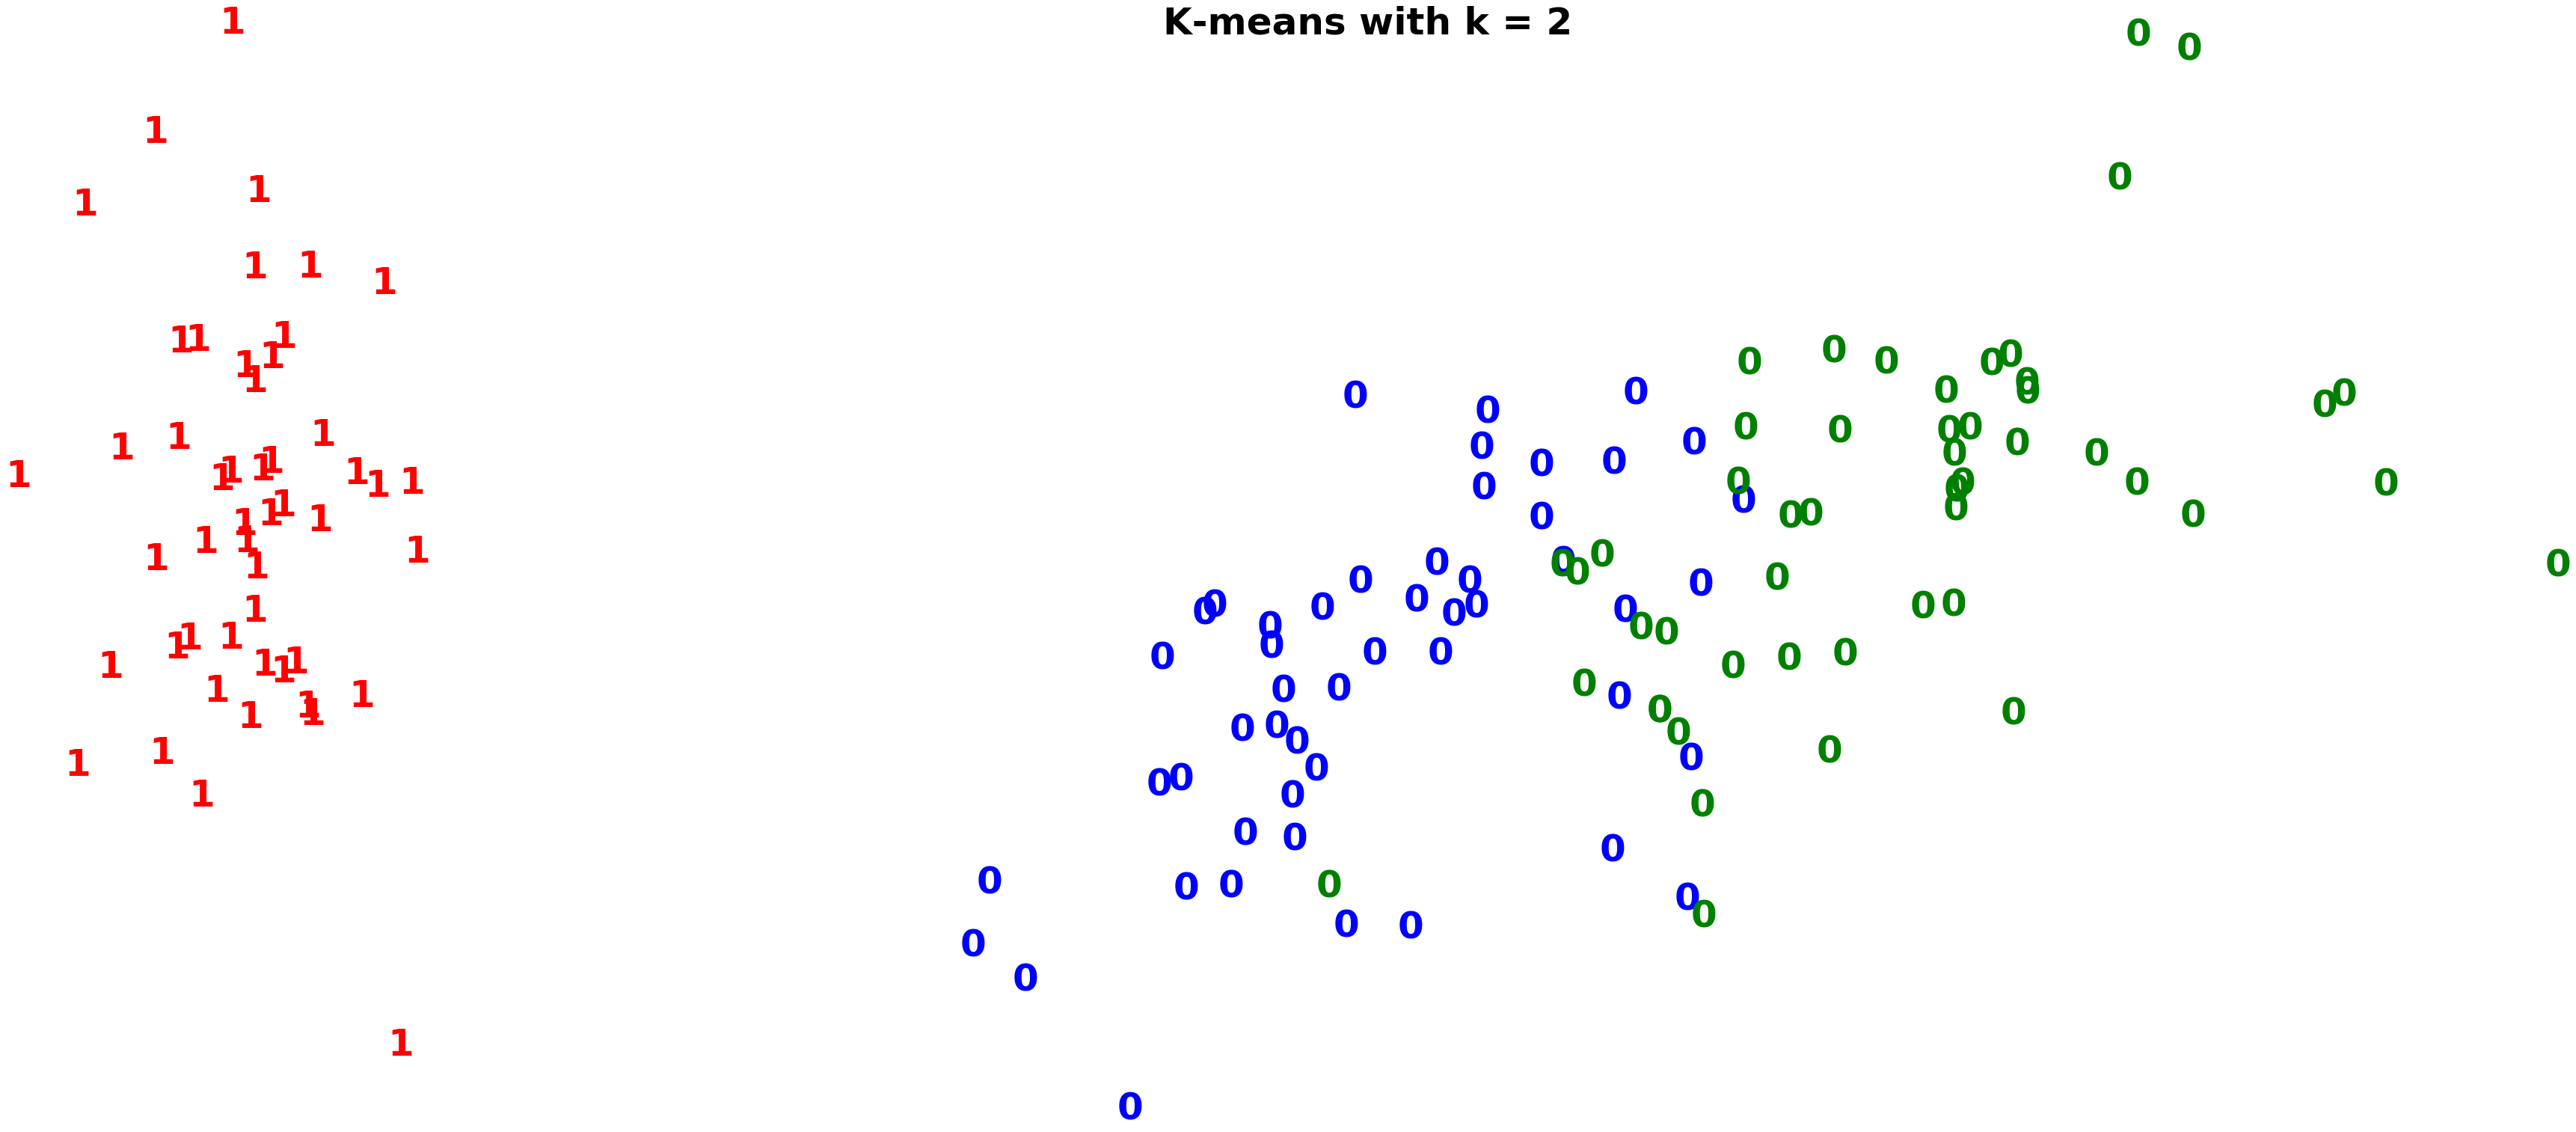

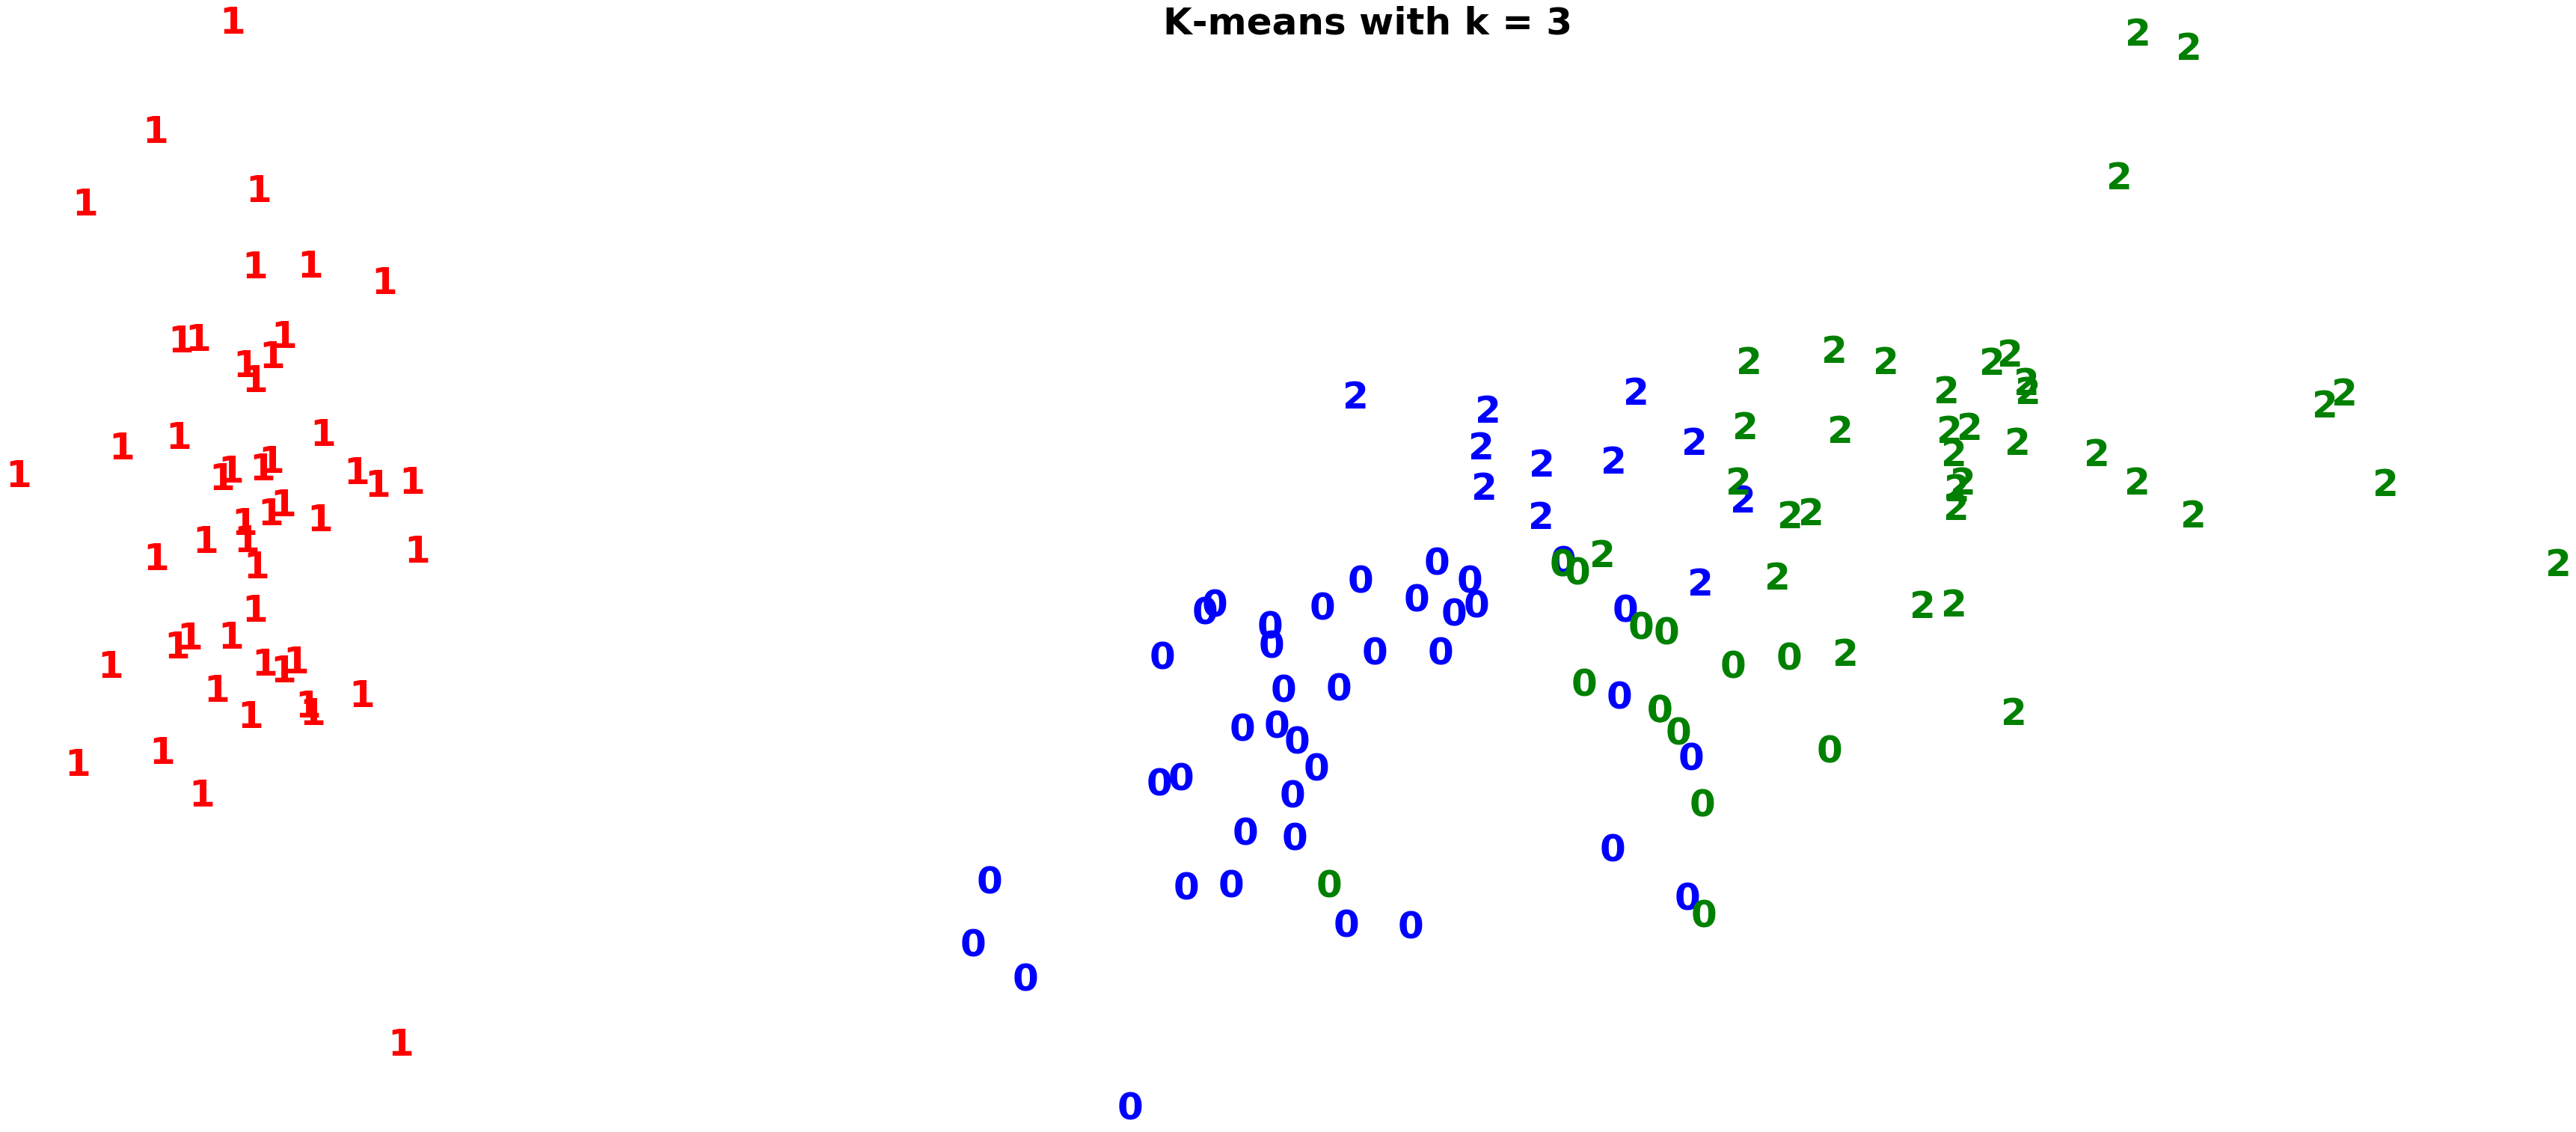

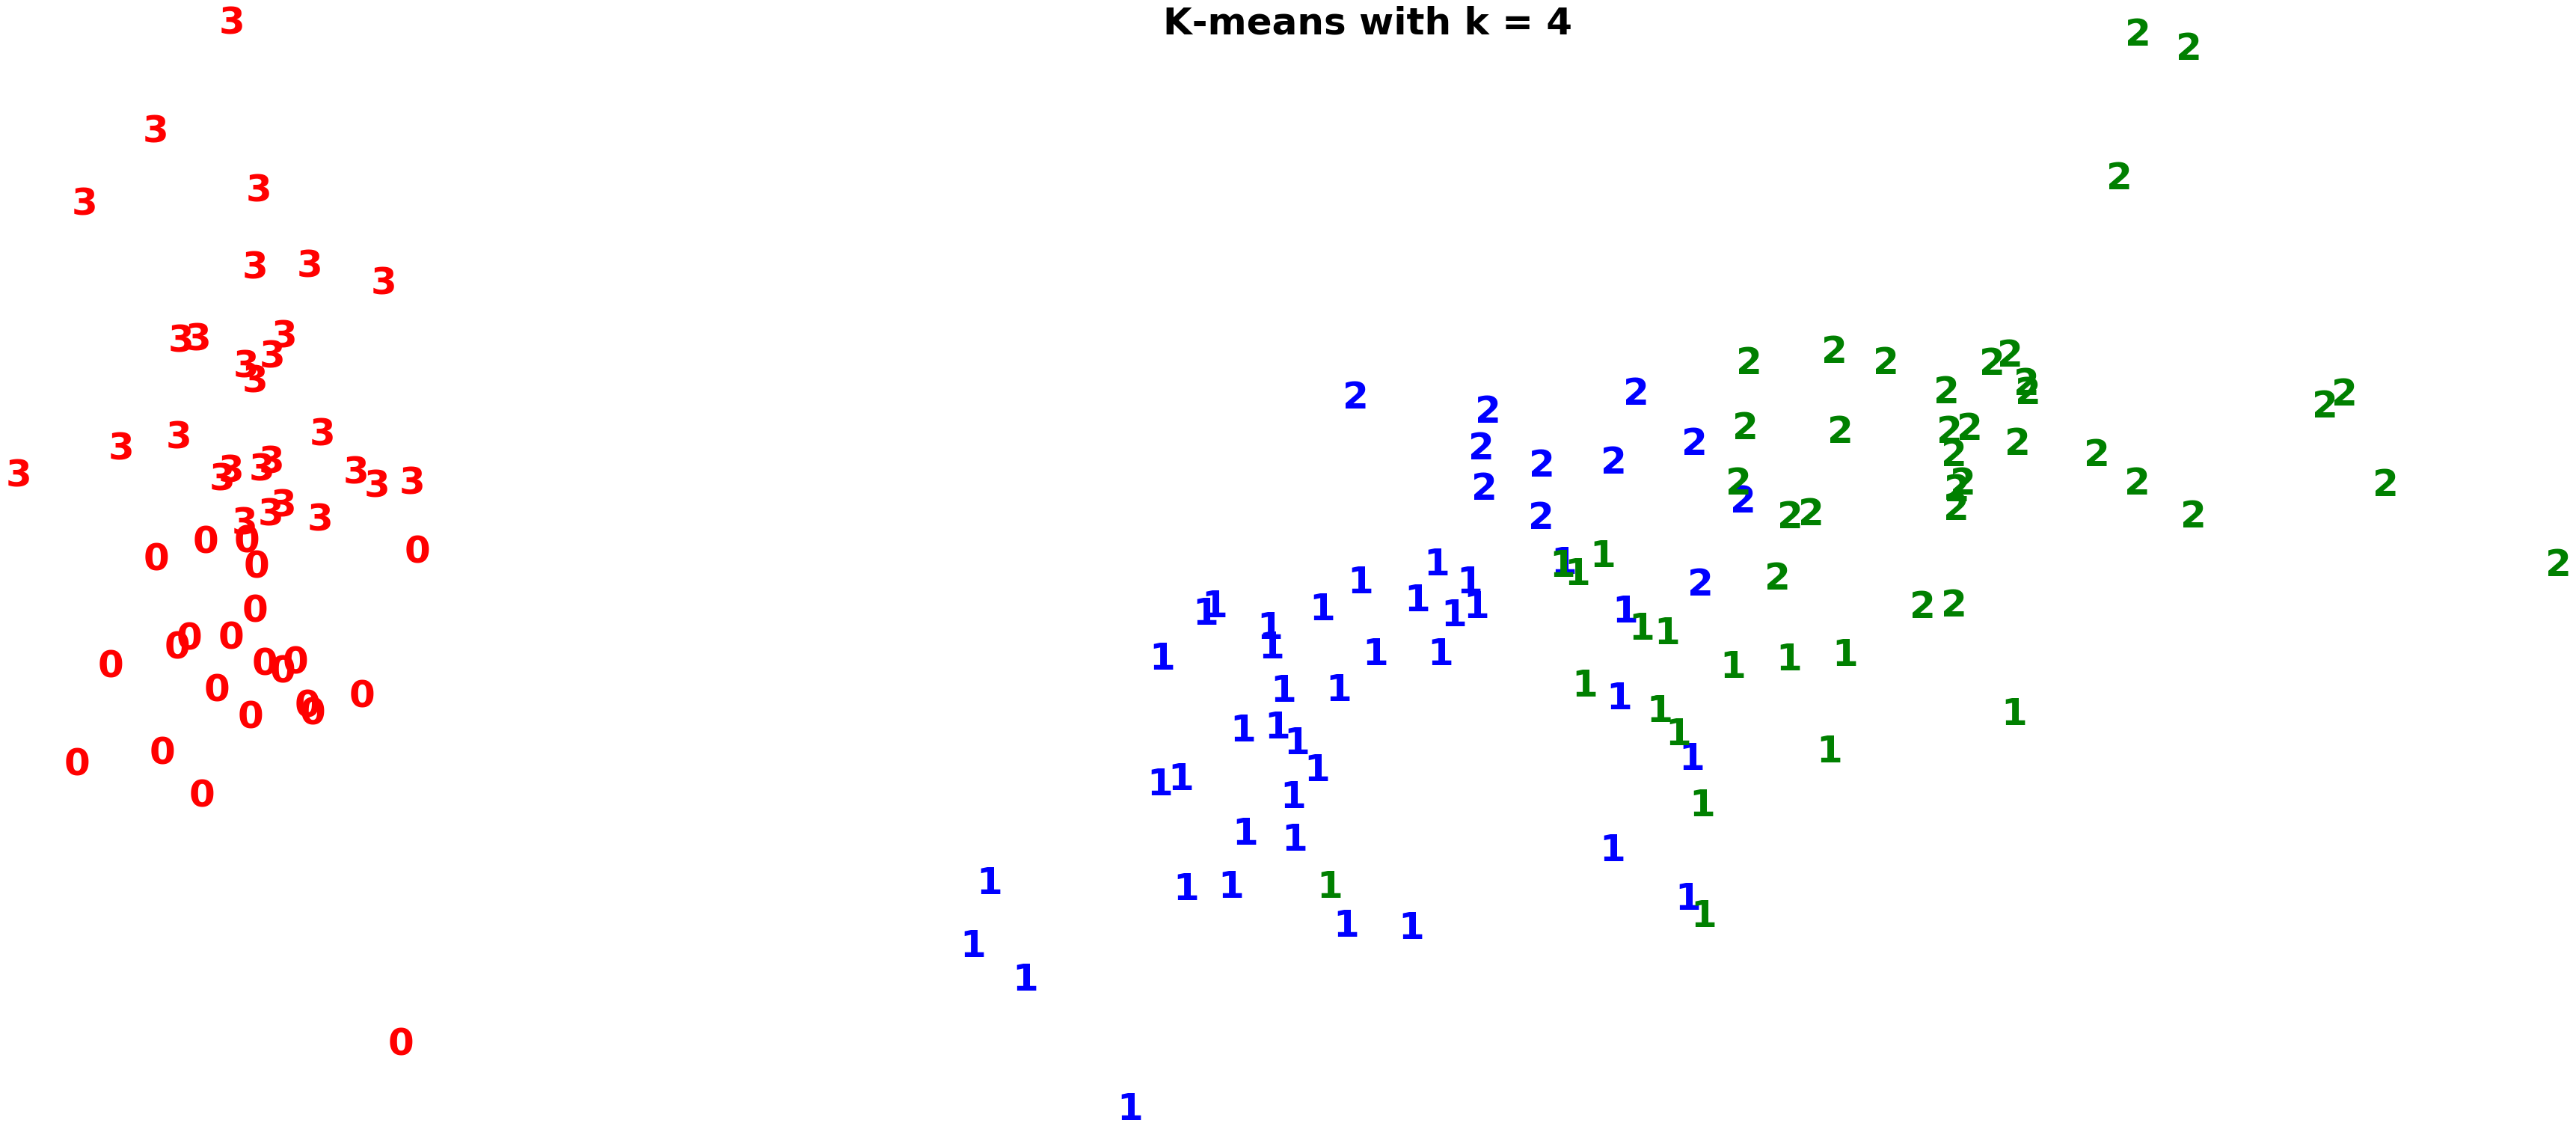

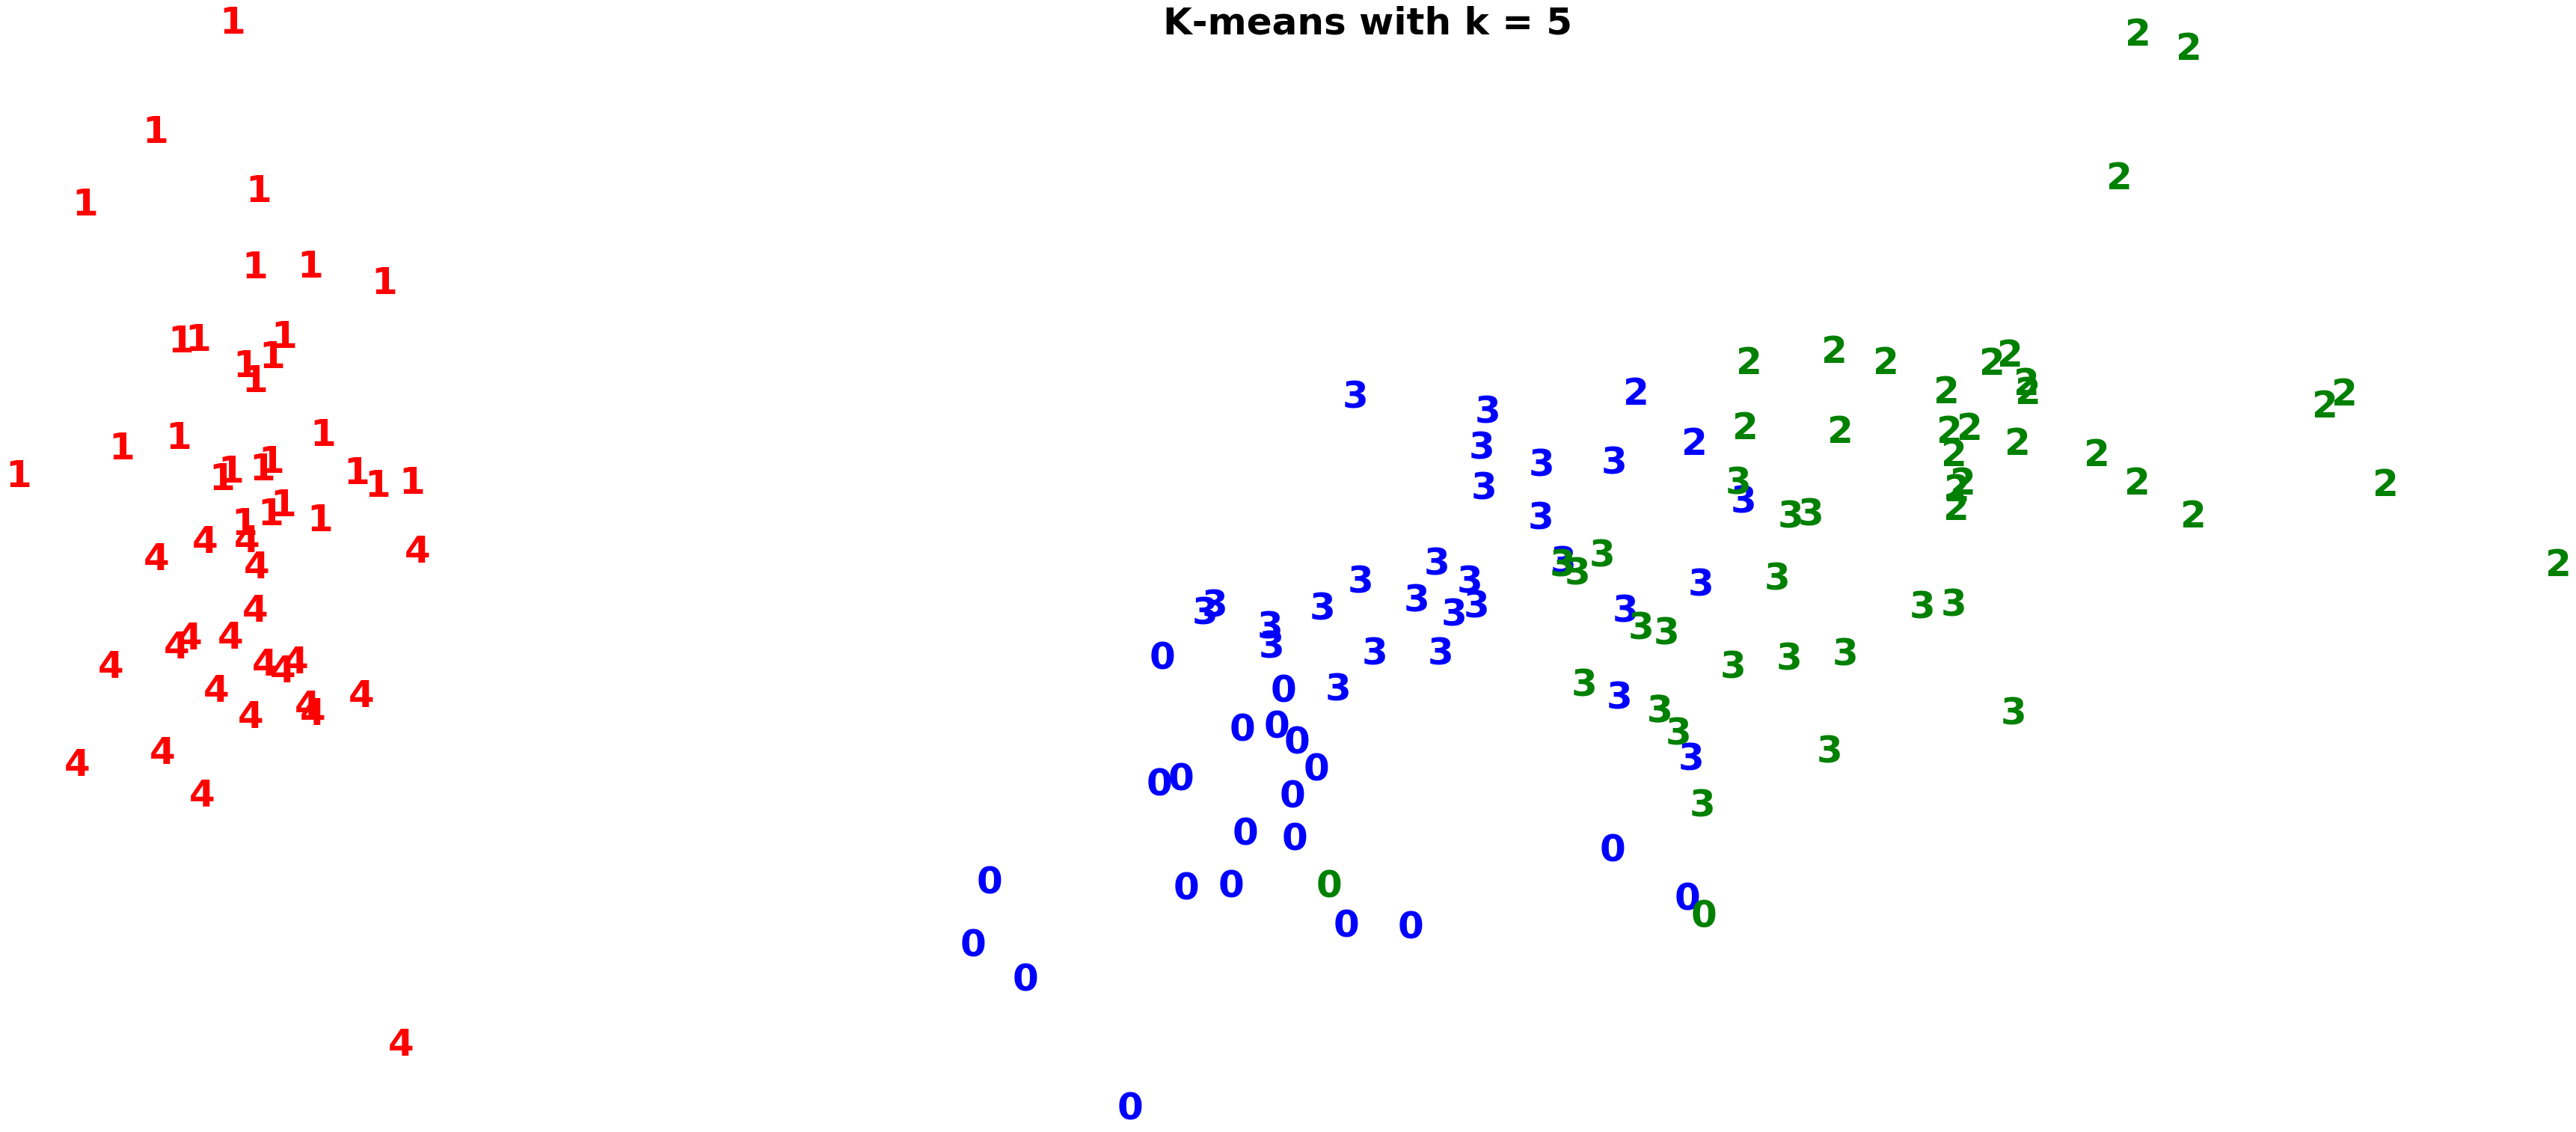

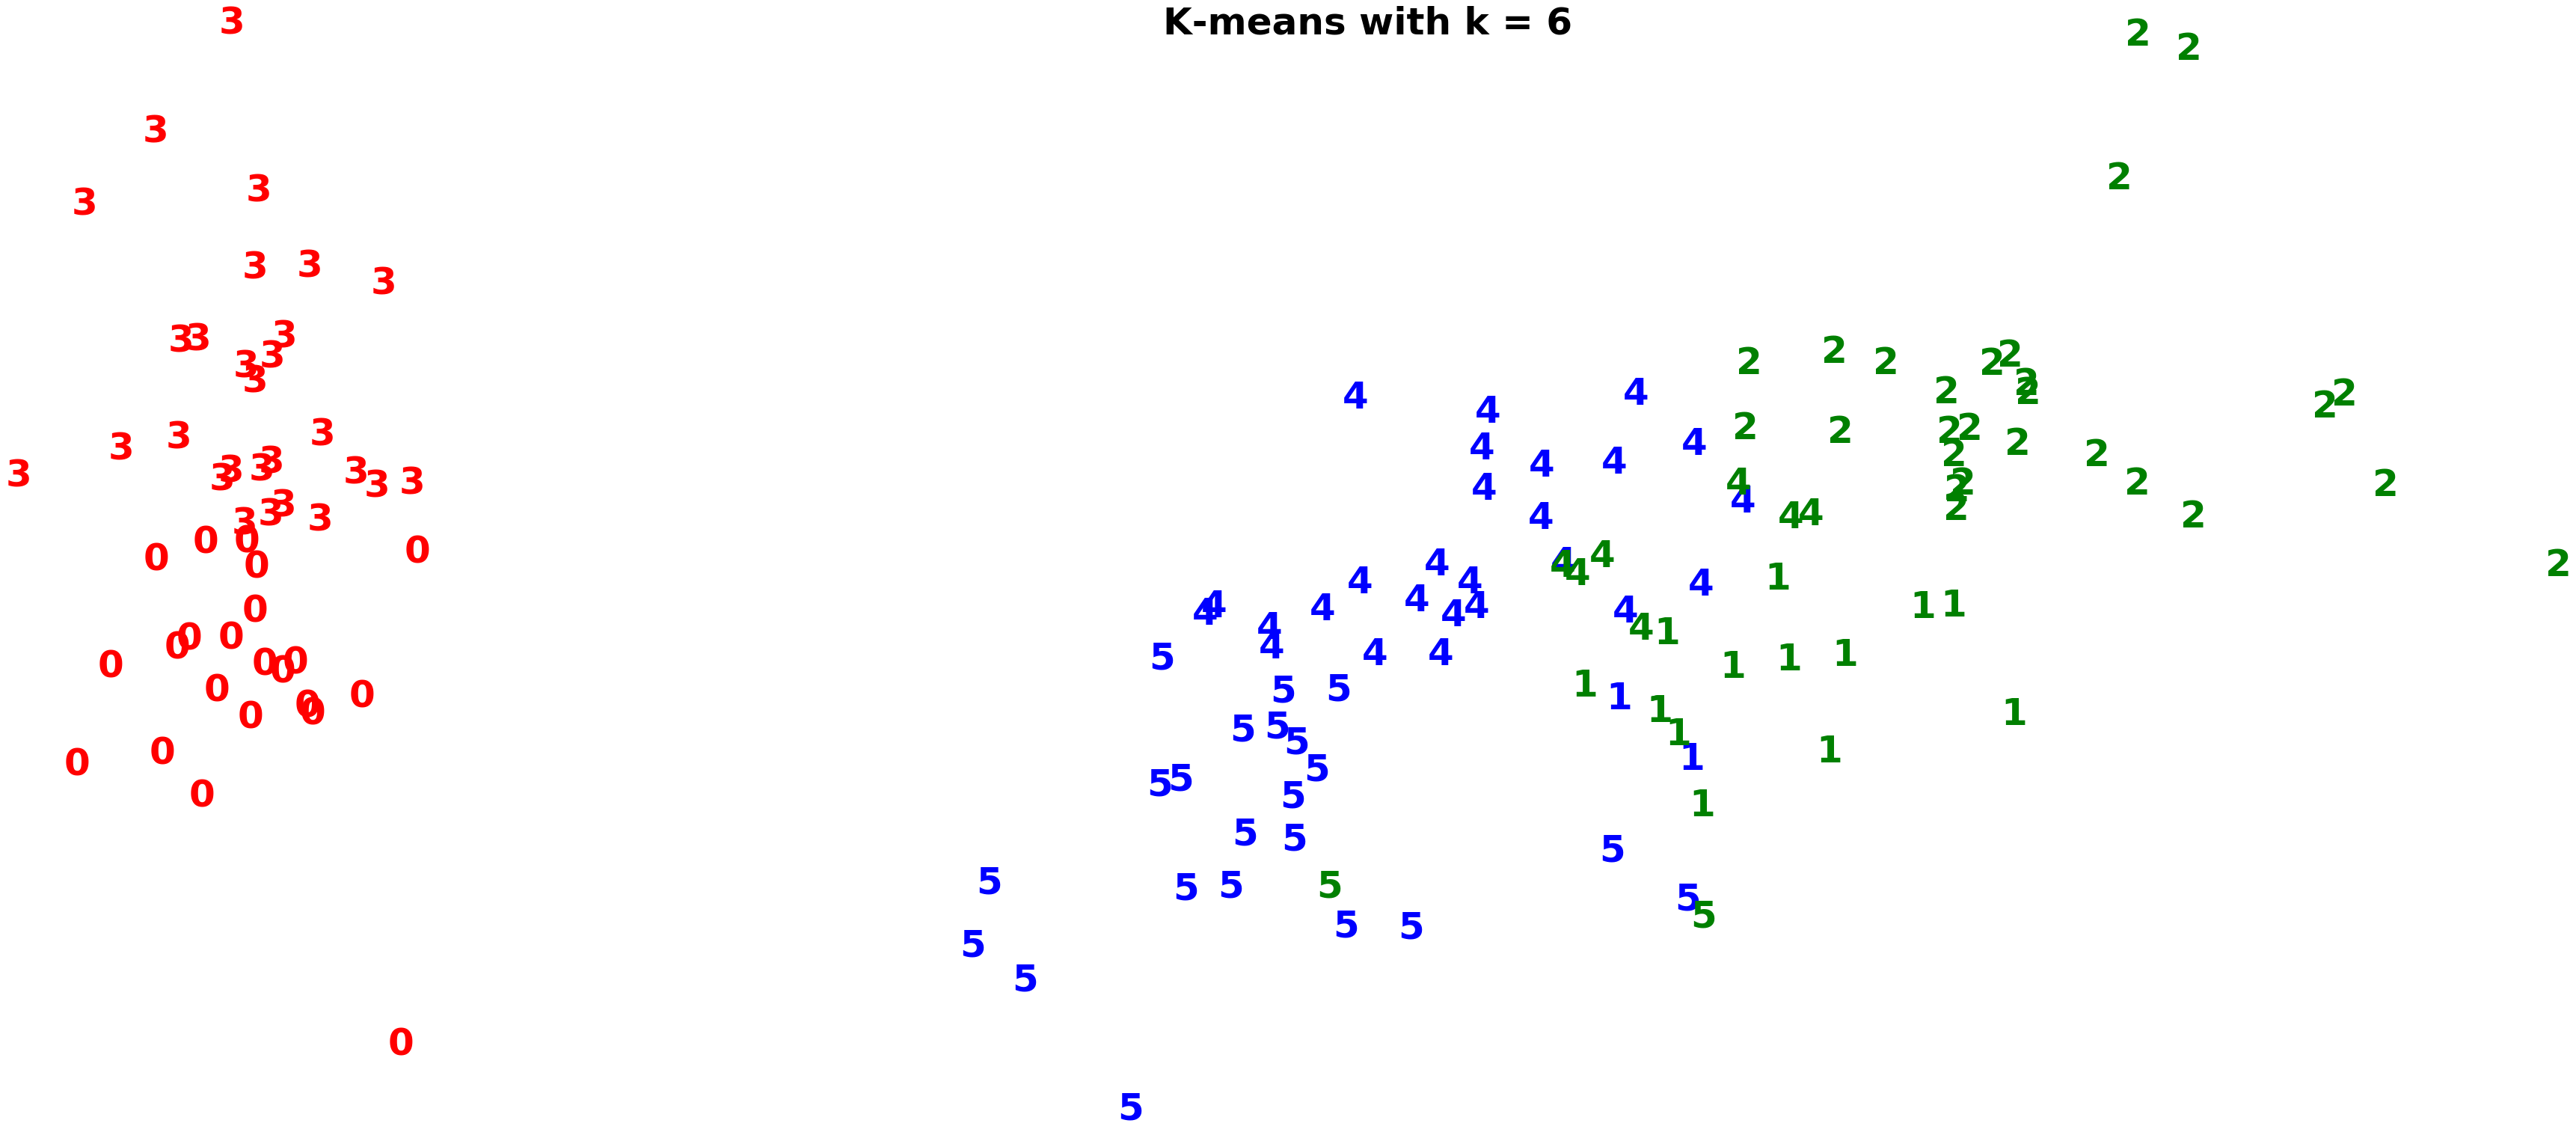

In [29]:
pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

Among the solutions, only the ones with k is equal to 2 and 3 assign a single cluster to the linearly separable class at the left most part of the figures. The others assign more than one class which we don't want for sure. So, k = 2 or k=3 is the only viable ones. However, when k=2, k-means can only assign a single cluster to the linearly non-separable classes where k=3 can assign them to two clusters. Hence, as we might expect, the best solution seems the be the one where k is equal to 3.

**2. Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.**

First we load the dataset and then normalize our variables. Also, to make it easier to visualize the clusters, we reduce the data to 2 components using PCA.

In [58]:
postgres_user = 'postgres'
postgres_pw = 'Merizim43.'
postgres_host = 'localhost'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [59]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

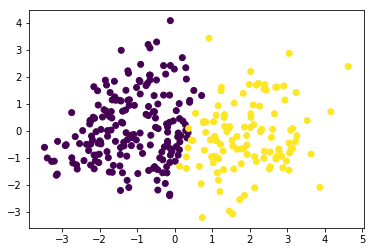

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0       38  151
1      101   13


In [61]:
# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X_std)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
# You will learn about cross-tabs/contingency
# tables in the next checkpoint
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Looks like this model is doing ok. We're correctly classifying 252 cases out of 303.